In [1]:
import pandas as pd
import utils.DataEngine as de
import matplotlib.pyplot as plt
import collections
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import Ridge, LinearRegression, Lasso
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
de1 = de.DataEngine('data2024')

In [3]:
df = de1.data['round_1']['price_df']
sdf = df[df['product'] == 'STARFRUIT'].copy()
adf = df[df['product'] == 'AMETHYSTS'].copy()

In [4]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,0.0
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,0.0
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,0.0
3998,-2,199900,STARFRUIT,4950,32,NaN,NaN,NaN,NaN,4954,7,4956.0,32.0,NaN,NaN,4952.0,0.0


In [5]:
adf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
5,-2,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,-2,199500,AMETHYSTS,10002,1,9996.0,1.0,9995.0,22.0,10004,1,10005.0,22.0,NaN,NaN,10003.0,0.0
3992,-2,199600,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10002,7,10004.0,1.0,10005.0,21.0,9999.0,0.0
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,0.0
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,0.0


In [6]:
sdf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,0.0
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,23,NaN,NaN,NaN,NaN,4952.5,0.0
3993,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,22,NaN,NaN,NaN,NaN,4952.5,0.0
3994,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,27,NaN,NaN,NaN,NaN,4952.5,0.0
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,0.0


In [7]:
LEN = 4
X = pd.DataFrame(columns=[f"lagg {i+1}" for i in range(LEN)])
for i in range(LEN):
    X[f"lagg {i+1}"] = sdf.mid_price.shift(i+1)
X = sm.add_constant(X)
y = sdf.mid_price.iloc[4:]
X = X.iloc[4:]

In [8]:
X

,const,lagg 1,lagg 2,lagg 3,lagg 4
9,1.0,4999.5,5000.0,5000.0,5002.5
11,1.0,4998.5,4999.5,5000.0,5000.0
12,1.0,4999.5,4998.5,4999.5,5000.0
15,1.0,5001.0,4999.5,4998.5,4999.5
17,1.0,5000.0,5001.0,4999.5,4998.5
...,...,...,...,...,...
3990,1.0,4949.5,4951.5,4954.0,4950.5
3993,1.0,4952.5,4949.5,4951.5,4954.0
3994,1.0,4952.5,4952.5,4949.5,4951.5
3996,1.0,4952.5,4952.5,4952.5,4949.5


In [9]:
y

9       4998.5
11      4999.5
12      5001.0
15      5000.0
17      5000.0
         ...  
3990    4952.5
3993    4952.5
3994    4952.5
3996    4952.5
3998    4952.0
Name: mid_price, Length: 1996, dtype: float64

In [10]:
m = sm.OLS(y, X)
res = m.fit()

In [11]:
res.params

const     4.392047
lagg 1    0.330427
lagg 2    0.223498
lagg 3    0.251663
lagg 4    0.193519
dtype: float64

In [12]:
model = AutoReg(sdf['mid_price'], lags=4)
model_fitted = model.fit()
model_fitted.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                 2000
Model:                     AutoReg(4)   Log Likelihood               -3467.787
Method:               Conditional MLE   S.D. of innovations              1.375
Date:                Mon, 01 Apr 2024   AIC                           6947.574
Time:                        09:53:19   BIC                           6981.167
Sample:                             4   HQIC                          6959.910
                                 2000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3920     10.797      0.407      0.684     -16.769      25.553
mid_price.L1     0.3304      0.022     15.050      0.000       0.287       0.373
mid_price.L2     0.2235      0.022      9.943      0.000       0.179       0.268
mid_price.L3     0.2517      0.022     11.196      0.000       0.208       0.296
mid_price.L4     0.1935      0.022      8.816      0.000       0.150       0.237
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           -0.0000j            1.0004           -0.0000
AR.2           -0.1964           -1.6336j            1.6454           -0.2690
AR.3           -0.1964           +1.6336j            1.6454            0.2690
AR.4           -1.9081           -0.0000j            1.9081           -0.5000
-----------------------------------------------------------------------------
"""

In [13]:
model2 = AutoReg(sdf['mid_price'], lags=2)
model2_fitted = model2.fit()
model2_fitted.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                 2000
Model:                     AutoReg(2)   Log Likelihood               -3622.079
Method:               Conditional MLE   S.D. of innovations              1.483
Date:                Mon, 01 Apr 2024   AIC                           7252.158
Time:                        09:53:19   BIC                           7274.558
Sample:                             2   HQIC                          7260.383
                                 2000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.2278     11.614      1.311      0.190      -7.535      37.991
mid_price.L1     0.5429      0.020     27.251      0.000       0.504       0.582
mid_price.L2     0.4540      0.020     22.778      0.000       0.415       0.493
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0021           +0.0000j            1.0021            0.0000
AR.2           -2.1981           +0.0000j            2.1981            0.5000
-----------------------------------------------------------------------------
"""

In [14]:
model2_fitted.params

const           15.227814
mid_price.L1     0.542945
mid_price.L2     0.453990
dtype: float64

In [15]:
model_lst = []
for i in range(1, 6):
    model = AutoReg(sdf['mid_price'], lags=i)
    model_fitted = model.fit()
    model_lst.append(model_fitted)

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

In [16]:
def calc_vals(model_lst):
    i = 1
    v_dict = {}
    for model in model_lst:
        p_arr = np.array(model.params[1:])

        l_arr = np.array([sdf['mid_price'].shift(i+1) for i in range(len(p_arr))])

        p_arr_reshaped = p_arr.reshape(-1, 1)

        s = p_arr_reshaped * l_arr
        s = np.sum(s, axis=0)

        r = s - sdf['mid_price'] + model.params[0]

        v_dict[i] = (r.mean(), r.std())
        i += 1
    
    return v_dict

In [17]:
d = calc_vals(model_lst)

C:\Users\giova\AppData\Local\Temp\ipykernel_28448\1848567116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = s - sdf['mid_price'] + model.params[0]


In [18]:
d

{1: (1.196035125088776e-09, 1.6650189485640157),
 2: (7.99054823864999e-10, 1.4831440319447955),
 3: (2.848594790195387e-10, 1.401758021400386),
 4: (6.895026967549073e-12, 1.3753115526938362),
 5: (9.930588014395838e-12, 1.3604543890463183)}

In [19]:
de2 = de.DataEngine('data2023')
dfb = de2.data['round_4']['price_df']
bdf = dfb[dfb['product'] == 'BANANAS']
bdf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
7,1,3000000,BANANAS,4871.0,9.0,4870.0,23.0,NaN,NaN,4877.0,23.0,NaN,NaN,NaN,NaN,4874.0,0.000000
12,1,3000100,BANANAS,4875.0,1.0,4871.0,4.0,4870.0,22.0,4877.0,22.0,NaN,NaN,NaN,NaN,4876.0,0.000000
23,1,3000200,BANANAS,4870.0,22.0,NaN,NaN,NaN,NaN,4876.0,22.0,NaN,NaN,NaN,NaN,4873.0,1.966309
39,1,3000300,BANANAS,4873.0,1.0,4868.0,26.0,NaN,NaN,4875.0,26.0,NaN,NaN,NaN,NaN,4874.0,8.063477
51,1,3000400,BANANAS,4870.0,8.0,4869.0,28.0,NaN,NaN,4871.0,5.0,4875.0,28.0,NaN,NaN,4870.5,8.017578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329950,3,5999500,BANANAS,4751.0,1.0,4748.0,22.0,NaN,NaN,4755.0,22.0,NaN,NaN,NaN,NaN,4753.0,179236.000000
329963,3,5999600,BANANAS,4748.0,30.0,NaN,NaN,NaN,NaN,4749.0,1.0,4753.0,5.0,4755.0,30.0,4748.5,178564.000000
329977,3,5999700,BANANAS,4748.0,20.0,NaN,NaN,NaN,NaN,4755.0,20.0,NaN,NaN,NaN,NaN,4751.5,178380.000000
329982,3,5999800,BANANAS,4748.0,23.0,NaN,NaN,NaN,NaN,4753.0,2.0,4755.0,23.0,NaN,NaN,4750.5,178496.000000


In [20]:
model4 = AutoReg(bdf['mid_price'], lags=1)
model_fitted4 = model.fit()
model_fitted4.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                 2000
Model:                     AutoReg(5)   Log Likelihood               -3444.381
Method:               Conditional MLE   S.D. of innovations              1.360
Date:                Mon, 01 Apr 2024   AIC                           6902.761
Time:                        09:53:20   BIC                           6941.950
Sample:                             5   HQIC                          6917.152
                                 2000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7455     10.691      0.163      0.870     -19.208      22.699
mid_price.L1     0.3017      0.022     13.626      0.000       0.258       0.345
mid_price.L2     0.1868      0.023      8.152      0.000       0.142       0.232
mid_price.L3     0.2189      0.023      9.609      0.000       0.174       0.264
mid_price.L4     0.1468      0.023      6.404      0.000       0.102       0.192
mid_price.L5     0.1454      0.022      6.571      0.000       0.102       0.189
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           -0.0000j            1.0001           -0.0000
AR.2            0.3263           -1.5413j            1.5754           -0.2168
AR.3            0.3263           +1.5413j            1.5754            0.2168
AR.4           -1.3311           -0.9991j            1.6643           -0.3975
AR.5           -1.3311           +0.9991j            1.6643            0.3975
-----------------------------------------------------------------------------
"""

In [21]:
model_lst_b = []
for i in range(1, 6):
    model = AutoReg(bdf['mid_price'], lags=i)
    model_fitted = model.fit()
    model_lst_b.append(model_fitted)

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

In [22]:
d1 = calc_vals(model_lst_b)

C:\Users\giova\AppData\Local\Temp\ipykernel_28448\1848567116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = s - sdf['mid_price'] + model.params[0]


In [23]:
d1

{1: (-0.20988451730493118, 1.6666213111172459),
 2: (-0.09743089276677099, 1.483675499343971),
 3: (-0.05567740114250094, 1.4034441614397692),
 4: (-0.033364098768230516, 1.3768540744344433),
 5: (-0.017595422491330216, 1.3624329804958126)}

In [24]:
val4 = bdf['mid_price'].shift(4)
val3 = bdf['mid_price'].shift(3)
val2 = bdf['mid_price'].shift(2)
val1 = bdf['mid_price'].shift(1)

co4, co3, co2, co1 = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
a = 4.481696494462085

vals = co4*val4 +  co3*val3  +co2*val2 + co1*val1
s = vals - bdf['mid_price'] + a
s.mean(), s.std()

(-0.04512892688968359, 1.5107047407205954)

In [25]:
coef = [0.14543357760079334, 0.14680375449599525, 0.21887676195406236, 0.18681650032375252,  0.3017063656145469]
intercept = 1.7455163186868958

cache = [1, 1, 1, 1, 1]

(np.array(cache) * np.array(coef))

array([0.14543358, 0.14680375, 0.21887676, 0.1868165 , 0.30170637])

In [26]:
sum(coef)

0.9996369599891504

In [27]:
class Analysis:
    def __init__(self, i, X_test, y_pred, y_test, coef, alpha, r2) -> None:
        self.ar_val = i
        self.X_test = X_test
        self.y_pred = y_pred
        self.y_test = y_test
        self.coef = coef
        self.alpha = alpha
        self.u_mse = ((y_test - y_pred)**2).sum()
        self.r2 = r2

        y_sub = y_pred - y_test
        condition = y_sub != 0

        self.wrong_count = (condition).sum()

        self.wrong_mean = y_sub[condition].mean()
        self.wrong_std = y_sub[condition].std()

In [28]:
def test_regression_models(tot_test, df_test, X_var, y_var, models_to_test=[LinearRegression()]):
    lst_vals = []
    size = int(len(df_test)/4)

    for i in range(1, tot_test+1):
        X_full = pd.DataFrame(columns=[f"lagg {j+1}" for j in range(i)])
        t = df_test[X_var].iloc[:size + i]
        y1 = df_test[y_var].iloc[:size + i]
        for j in range(i):
            X_full[f"lagg {j+1}"] = t.shift(j+1)

        y_train = y1.iloc[i:]
        X_train = X_full.iloc[i:]

        X_full_k = pd.DataFrame(columns=[f"lagg {j+1}" for j in range(i)])
        k = df_test[X_var].iloc[size + i:]
        y2 = df_test[y_var].iloc[size + i:]
        for j in range(i):
            X_full_k[f"lagg {j+1}"] = k.shift(j+1)

        y_test = y2.iloc[i:]
        X_test = X_full_k.iloc[i:]

        for mod in models_to_test:
            mod.fit(X_train, y_train)
            y_pred = mod.predict(X_test)

            r2 = r2_score(y_test, y_pred)

            lst_vals.append(Analysis(i, X_test, y_pred, y_test, mod.coef_, mod.intercept_, r2))

    return lst_vals

In [29]:
val4 = sdf['mid_price'].shift(4)
val3 = sdf['mid_price'].shift(3)
val2 = sdf['mid_price'].shift(2)
val1 = sdf['mid_price'].shift(1)

co4, co3, co2, co1 = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
a = 4.481696494462085

vals = co4*val4 +  co3*val3  +co2*val2 + co1*val1
s = vals - sdf['mid_price'] + a
s.mean(), s.std()

(-0.18483031123709295, 1.5422175716802697)

In [30]:
sdf[sdf['bid_price_1'] < sdf['mid_price'].shift(1)]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,0.0
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,0.0
11,-2,500,STARFRUIT,4996,30,NaN,NaN,NaN,NaN,5003,30,NaN,NaN,NaN,NaN,4999.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,23,NaN,NaN,NaN,NaN,4952.5,0.0
3993,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,22,NaN,NaN,NaN,NaN,4952.5,0.0
3994,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,27,NaN,NaN,NaN,NaN,4952.5,0.0
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,0.0


In [31]:
condition_bid = (sdf['bid_price_1'] <= sdf['mid_price'].shift(1)) | sdf['bid_price_2'].isna()
bid_selected_series = np.where(condition_bid, sdf['bid_price_1'], sdf['bid_price_2'])

condition_ask = (sdf['ask_price_1'] >= sdf['mid_price'].shift(1)) | sdf['ask_price_2'].isna()
ask_selected_series = np.where(condition_ask, sdf['ask_price_1'], sdf['ask_price_2'])

sdf['bid_selected_series'] = bid_selected_series.astype(int)
sdf['ask_selected_series'] = ask_selected_series.astype(int)

bi, ai = test_regression_models(5, sdf, 'bid_selected_series', 'bid_price_1'), test_regression_models(5, sdf, 'ask_selected_series', 'ask_price_1')

In [32]:
for index in range(len(bi)):
    print(index)
    print(bi[index].wrong_count, ai[index].wrong_count)
    print((bi[index].wrong_mean, bi[index].wrong_std), (ai[index].wrong_mean, ai[index].wrong_std))
    print(bi[index].u_mse, ai[index].u_mse)

0
1498 1498
(0.8494551103223879, 1.7728030704775697) (0.6508766645434894, 1.800893076394913)
5785.73542657229 5489.7075290988705
1
1496 1496
(0.45059659308433275, 1.6922911350611058) (0.07615030135190516, 1.6667893173261175)
4585.198467670591 4162.06411650733
2
1494 1494
(0.28369218360466947, 1.6609224653769317) (-0.13711439152930044, 1.644746695478429)
4238.923504966069 4066.938928993297
3
1492 1492
(0.14418855226600516, 1.6556274749863076) (-0.2166169144961488, 1.6285411539782184)
4118.002768068952 4024.359067056835
4
1490 1490
(0.08716863564658457, 1.6462184643878228) (-0.39157548995288183, 1.6364906035200701)
4046.564034030023 4216.156859519162


In [33]:
best_bi = bi[3]
best_ai = ai[3]

mids = ((best_bi.y_test + best_ai.y_test) / 2)
mid_preds = ((best_bi.y_pred + best_ai.y_pred) / 2)
mid_diffs = mid_preds - mids

(mid_diffs > 1).sum()

mid_diffs[mid_diffs <= -1].mean(), mid_diffs[mid_diffs >= 1].mean()

(-2.0761965280994934, 2.087268367221402)

In [34]:
de2 = de.DataEngine('data2023')
dfb1 = de2.data['round_1']['price_df']
dfb2 = de2.data['round_2']['price_df']
dfb3 = de2.data['round_3']['price_df']
dfb4 = de2.data['round_4']['price_df']

dfb1 = dfb1[dfb1['product'] == 'BANANAS']
dfb2 = dfb2[(dfb2['product'] == 'BANANAS') & (dfb2.day == 1)]
dfb3 = dfb3[(dfb3['product'] == 'BANANAS')  & (dfb3.day == 2)]
dfb4 = dfb4[(dfb4['product'] == 'BANANAS') & (dfb4.day == 3)]

dfb = pd.concat([dfb1, dfb2, dfb3, dfb4])

In [35]:
dfb

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,BANANAS,4997.0,26.0,NaN,NaN,NaN,NaN,5003.0,26.0,NaN,NaN,NaN,NaN,5000.0,0.000000
2,-2,100,BANANAS,4997.0,20.0,NaN,NaN,NaN,NaN,4998.0,1.0,5004.0,20.0,NaN,NaN,4997.5,2.863281
5,-2,200,BANANAS,4997.0,31.0,NaN,NaN,NaN,NaN,5004.0,31.0,NaN,NaN,NaN,NaN,5000.5,2.536621
7,-2,300,BANANAS,4997.0,27.0,NaN,NaN,NaN,NaN,5004.0,27.0,NaN,NaN,NaN,NaN,5000.5,2.405762
9,-2,400,BANANAS,4997.0,20.0,NaN,NaN,NaN,NaN,5002.0,9.0,5004.0,20.0,NaN,NaN,4999.5,2.925781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329950,3,5999500,BANANAS,4751.0,1.0,4748.0,22.0,NaN,NaN,4755.0,22.0,NaN,NaN,NaN,NaN,4753.0,179236.000000
329963,3,5999600,BANANAS,4748.0,30.0,NaN,NaN,NaN,NaN,4749.0,1.0,4753.0,5.0,4755.0,30.0,4748.5,178564.000000
329977,3,5999700,BANANAS,4748.0,20.0,NaN,NaN,NaN,NaN,4755.0,20.0,NaN,NaN,NaN,NaN,4751.5,178380.000000
329982,3,5999800,BANANAS,4748.0,23.0,NaN,NaN,NaN,NaN,4753.0,2.0,4755.0,23.0,NaN,NaN,4750.5,178496.000000


# Exponential Smoothing about 0.8? 0.7?

In [36]:
modelb = AutoReg(dfb['mid_price'], lags=4)
model_fittedb = modelb.fit()
model_fittedb.summary()

alpha, pars = (4.4817,  [-0.0187, 0.0455,  0.1632,  0.8091])

model_fittedb.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                60000
Model:                     AutoReg(4)   Log Likelihood             -104163.614
Method:               Conditional MLE   S.D. of innovations              1.373
Date:                Mon, 01 Apr 2024   AIC                         208339.228
Time:                        09:53:22   BIC                         208393.240
Sample:                             4   HQIC                        208356.005
                                60000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4578      0.385      1.188      0.235      -0.297       1.213
mid_price.L1     0.3425      0.004     85.596      0.000       0.335       0.350
mid_price.L2     0.2561      0.004     61.605      0.000       0.248       0.264
mid_price.L3     0.2030      0.004     48.834      0.000       0.195       0.211
mid_price.L4     0.1983      0.004     49.557      0.000       0.190       0.206
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2           -1.7645           -0.0000j            1.7645           -0.5000
AR.3           -0.1296           -1.6855j            1.6905           -0.2622
AR.4           -0.1296           +1.6855j            1.6905            0.2622
-----------------------------------------------------------------------------
"""

In [37]:
condition_bid_ban = (dfb['bid_price_1'] <= dfb['mid_price'].shift(1)) | dfb['bid_price_2'].isna()
bid_selected_series_ban = np.where(condition_bid_ban, dfb['bid_price_1'], dfb['bid_price_2'])

condition_ask_ban = (dfb['ask_price_1'] >= dfb['mid_price'].shift(1)) | dfb['ask_price_2'].isna()
ask_selected_series_ban = np.where(condition_ask_ban, dfb['ask_price_1'], dfb['ask_price_2'])

dfb['bid_selected_series_ban'] = bid_selected_series_ban.astype(int)
dfb['ask_selected_series_ban'] = ask_selected_series_ban.astype(int)

In [38]:
ban_b, ban_a = test_regression_models(5, dfb, 'bid_selected_series_ban', 'bid_price_1'), test_regression_models(5, dfb, 'ask_selected_series_ban', 'ask_price_1')

In [39]:
for index in range(len(ban_b)):
    print(index)
    print(ban_b[index].wrong_count, ban_a[index].wrong_count)
    print((ban_b[index].wrong_mean, ban_b[index].wrong_std), (ban_a[index].wrong_mean, ban_a[index].wrong_std))
    print(ban_b[index].u_mse, ban_a[index].u_mse)
    print(ban_b[index].r2, ban_a[index].r2)

0
44998 44998
(0.21228875588258994, 1.7278676467728586) (0.18164863190084957, 1.708677266549504)
136367.6437158889 132857.0154747995
0.9987869926309297 0.9988204905258522
1
44996 44996
(0.14986941214124722, 1.6591678615917806) (0.09777520930218396, 1.6201733845153128)
124874.59348022976 118540.31738611934
0.9988891126208453 0.9989474907353052
2
44994 44994
(0.12395125503341953, 1.638913489013818) (0.06869622560039844, 1.5938365809749768)
121544.16576885822 114508.72930160203
0.9989186368383609 0.9989831850463857
3
44992 44992
(0.11547418379749638, 1.6323336826352672) (0.05374205290274838, 1.5848213143351888)
120479.05194295879 113131.97826490793
0.9989280077363343 0.9989953097071633
4
44990 44990
(0.10562981728925422, 1.6294652719506282) (0.045292151871264744, 1.5806848228166746)
119954.84458133591 112500.2102412949
0.9989325671437854 0.9990008265584505


In [40]:
best_b = ban_b[3]
best_a = ban_a[3]

mids_b = ((best_b.y_test + best_a.y_test) / 2)
mid_preds_b = ((best_b.y_pred + best_a.y_pred) / 2)
mid_diffs_b = mid_preds_b - mids_b

mid_diffs_b[mid_diffs_b != 0].std()

1.269690151381672

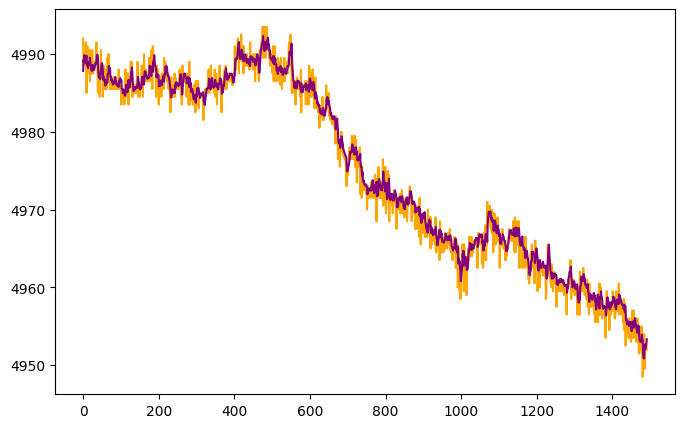

In [41]:
mid_i = test_regression_models(5, sdf, 'mid_price', 'mid_price')
best_mid = mid_i[3]

mids_p = best_mid.y_test
mid_preds_p = best_mid.y_pred
mid_diffs_p = mid_preds_p - mids_p

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(mids_p)), mids_p, color='orange')
plt.plot(np.arange(len(mids_p)), mid_preds_p, color='purple')

plt.show()

In [42]:
best_mid.coef[::-1], best_mid.alpha

(array([0.18888923, 0.23857839, 0.22763481, 0.32536866]), 97.53116674278772)

In [43]:
dtf = sdf.copy()

diff_series = dtf['bid_price_1'].diff()

In [44]:
diff_df = diff_series.iloc[1:].to_frame()
diff_df['sign'] = np.sign(diff_df['bid_price_1'])
diff_df['conseq_neg'] = 0
diff_df['conseq_pos'] = 0
diff_df['conseq_no_change'] = 0
is_negative = diff_df['sign'] == -1
is_positive = diff_df['sign'] == 1
is_no_change = diff_df['sign'] == 0
group_ids_neg = is_negative.ne(is_negative.shift()).cumsum()
group_ids_pos = is_positive.ne(is_positive.shift()).cumsum()
group_ids_no_change = is_no_change.ne(is_no_change.shift()).cumsum()

# Use these groups to count consecutive negatives only
diff_df.loc[is_negative, 'conseq_neg'] = is_negative.groupby(group_ids_neg).cumsum()
diff_df.loc[is_positive, 'conseq_pos'] = is_positive.groupby(group_ids_pos).cumsum()
diff_df.loc[is_no_change, 'conseq_no_change'] = is_no_change.groupby(group_ids_no_change).cumsum()


sequence_counts_neg = diff_df.conseq_neg.value_counts()[1:]
sequence_counts_pos = diff_df.conseq_pos.value_counts()[1:]
sequence_counts_no_change = diff_df.conseq_no_change.value_counts()[1:]

diff_df['prev_sign'] = diff_df['sign'].shift(1)
diff_df['neg_to_pos'] = ((diff_df['prev_sign'] == -1) & (diff_df['sign'] == 1)).astype(int)
diff_df['pos_to_neg'] = ((diff_df['prev_sign'] == 1) & (diff_df['sign'] == -1)).astype(int)
diff_df['pos_to_zero'] = ((diff_df['prev_sign'] == 1) & (diff_df['sign'] == 0)).astype(int)
diff_df['neg_to_zero'] = ((diff_df['prev_sign'] == -1) & (diff_df['sign'] == 0)).astype(int)
diff_df['zero_to_pos'] = ((diff_df['prev_sign'] == 0) & (diff_df['sign'] == 1)).astype(int)
diff_df['zero_to_neg'] = ((diff_df['prev_sign'] == 0) & (diff_df['sign'] == -1)).astype(int)

transitions_counts = {
    'Negative to Positive': diff_df['neg_to_pos'].sum() / len(dtf),
    'Positive to Negative': diff_df['pos_to_neg'].sum() / len(dtf),
    'Positive to Zero': diff_df['pos_to_zero'].sum() / len(dtf),
    'Negative to Zero': diff_df['neg_to_zero'].sum() / len(dtf),
    'Zero to Positive': diff_df['zero_to_pos'].sum() / len(dtf),
    'Zero to Negative': diff_df['zero_to_neg'].sum() / len(dtf),
}

# PONTENTIAL IMPLEMENTATION INTO STRATEGY

# SIMULATION LIKELY TO FILL BROKEN LEVELS

## Will bots allow you to continue downwards?

In [45]:
diff_df

,bid_price_1,sign,conseq_neg,conseq_pos,conseq_no_change,prev_sign,neg_to_pos,pos_to_neg,pos_to_zero,neg_to_zero,zero_to_pos,zero_to_neg
3,-5.0,-1.0,1,0,0,NaN,0,0,0,0,0,0
4,0.0,0.0,0,0,1,-1.0,0,0,0,1,0,0
7,-1.0,-1.0,1,0,0,0.0,0,0,0,0,0,1
9,-1.0,-1.0,2,0,0,-1.0,0,0,0,0,0,0
11,1.0,1.0,0,1,0,-1.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0.0,0.0,0,0,2,0.0,0,0,0,0,0,0
3993,0.0,0.0,0,0,3,0.0,0,0,0,0,0,0
3994,0.0,0.0,0,0,4,0.0,0,0,0,0,0,0
3996,0.0,0.0,0,0,5,0.0,0,0,0,0,0,0


In [46]:
transitions_counts

{'Negative to Positive': 0.109,
 'Positive to Negative': 0.166,
 'Positive to Zero': 0.073,
 'Negative to Zero': 0.1415,
 'Zero to Positive': 0.1305,
 'Zero to Negative': 0.084}

In [47]:
total_counts_neg = sequence_counts_neg.sum()
percentages_neg = (sequence_counts_neg / total_counts_neg)

total_counts_pos = sequence_counts_pos.sum()
percentages_pos = (sequence_counts_pos / total_counts_pos)

total_counts_no_change = sequence_counts_no_change.sum()
percentages_no_change = (sequence_counts_no_change / total_counts_no_change)

percentages_neg, percentages_pos, percentages_no_change

(conseq_neg
 1    0.869792
 2    0.130208
 Name: count, dtype: float64,
 conseq_pos
 1    0.878899
 2    0.111927
 3    0.009174
 Name: count, dtype: float64,
 conseq_no_change
 1    0.488610
 2    0.258542
 3    0.127563
 4    0.072893
 5    0.030752
 6    0.012528
 7    0.006834
 8    0.001139
 9    0.001139
 Name: count, dtype: float64)

In [48]:
r = 100

In [49]:
val4_b = sdf['mid_price'].shift(4)
val3_b = sdf['mid_price'].shift(3)
val2_b = sdf['mid_price'].shift(2)
val1_b = sdf['mid_price'].shift(1)

co4_b, co3_b, co2_b, co1_b = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
a_b = 4.481696494462085

vals_b = (co4_b*val4_b +  co3_b*val3_b  +co2_b*val2_b + co1_b*val1_b) + a_b

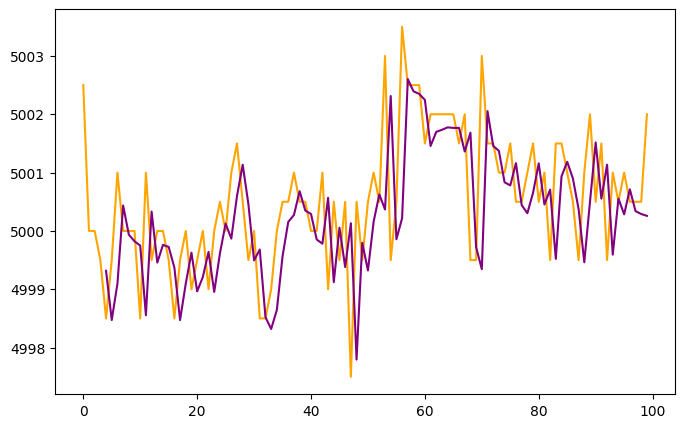

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(vals_b[:r])), sdf['mid_price'].iloc[:r], color='orange')
plt.plot(np.arange(len(vals_b[:r])), vals_b[:r], color='purple')
plt.show()

In [51]:
cond = (vals_b[:r] - sdf['mid_price'].iloc[:r]).to_frame()
mae = abs(cond).sum()
mse = (cond ** 2).sum()

mae.iloc[0], mse.iloc[0], cond[abs(cond['mid_price']) > 2].count()

(81.86346252575913,
 124.08354633193846,
 mid_price    8
 dtype: int64)

In [52]:
comp_co4_b, comp_co3_b, comp_co2_b, comp_co1_b = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
comp_a_b = 4.481696494462085

comp_vals_b = (comp_co4_b*val4_b +  comp_co3_b*val3_b  +comp_co2_b*val2_b + comp_co1_b*val1_b) + comp_a_b

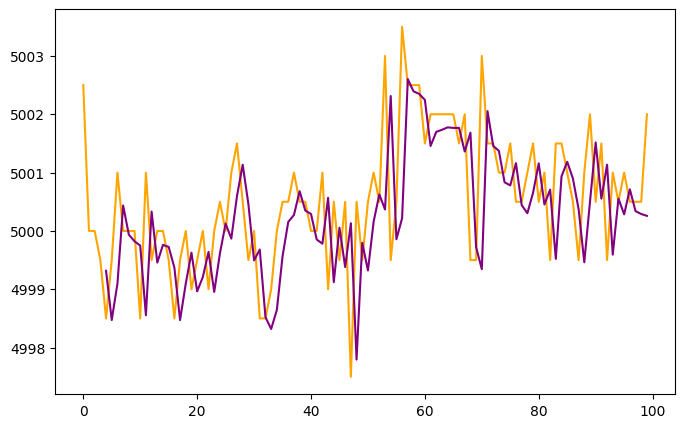

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(comp_vals_b[:r])), sdf['mid_price'].iloc[:r], color='orange')
plt.plot(np.arange(len(comp_vals_b[:r])), comp_vals_b[:r], color='purple')
plt.show()

In [54]:
comp_cond = (comp_vals_b[:r] - sdf['mid_price'].iloc[:r]).to_frame()
mae = abs(comp_cond).sum()
mse = (comp_cond ** 2).sum()

mae.iloc[0], mse.iloc[0], comp_cond[abs(comp_cond['mid_price']) > 2].count()

(81.86346252575913,
 124.08354633193846,
 mid_price    8
 dtype: int64)

In [55]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [56]:
estimator = LinearRegression()
val = KFold(5)


In [57]:
X = pd.DataFrame()
laggs = range(1, 5)
for i in laggs:
    X[f"lagg {i}"] = sdf.mid_price.shift(i)

X["midprice"] = sdf.mid_price
#X["const"] = 1
X.dropna(inplace=True)
y = X.pop("midprice")

mods = range(200, 1500, 100)
l = []
for i in mods:
    X_ = X.copy(deep=True)
    X_.loc[sdf.timestamp%i == 0, f"mod {i}"] = 1
    X_.loc[sdf.timestamp%i != 0, f"mod {i}"] = 0



    cross_val_score(LinearRegression(), X_, y)

    estimator.fit(X_,y)
    l += [estimator.coef_[-1]]
    

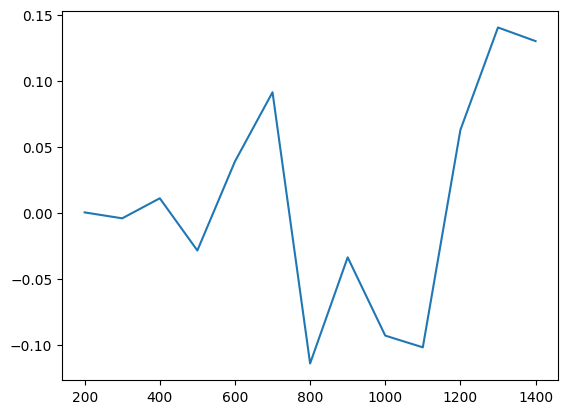

In [58]:
plt.plot(mods, l)

In [59]:
len(sdf)

2000

In [60]:
X

,lagg 1,lagg 2,lagg 3,lagg 4
9,4999.5,5000.0,5000.0,5002.5
11,4998.5,4999.5,5000.0,5000.0
12,4999.5,4998.5,4999.5,5000.0
15,5001.0,4999.5,4998.5,4999.5
17,5000.0,5001.0,4999.5,4998.5
...,...,...,...,...
3990,4949.5,4951.5,4954.0,4950.5
3993,4952.5,4949.5,4951.5,4954.0
3994,4952.5,4952.5,4949.5,4951.5
3996,4952.5,4952.5,4952.5,4949.5


In [61]:
cross_val_score(LinearRegression(), X, y)

array([0.79165747, 0.74731328, 0.85666804, 0.87203646, 0.89349796])

In [62]:
estimator.fit(X,y)
pd.DataFrame(estimator.coef_, columns=["value"], index = X.columns)

,value
lagg 1,0.330427
lagg 2,0.223498
lagg 3,0.251663
lagg 4,0.193519


In [63]:
mid_i = test_regression_models(5, sdf, 'mid_price', 'mid_price')
best_mid = mid_i[3]

mids_p = best_mid.y_test
mid_preds_p = best_mid.y_pred
mid_diffs_p = mid_preds_p - mids_p

In [64]:
mid_i = test_regression_models(5, sdf, 'mid_price', 'mid_price')
ind = 0
best_mid = mid_i[ind]

mids_p = best_mid.y_test
mid_preds_p = best_mid.y_pred
mid_diffs_p = mids_p.shift(1) - mids_p
err_past = abs(mid_diffs_p).dropna()

X_err = best_mid.X_test.copy()

X_err['err_sum'] = 0

for i in range(0, len(best_mid.coef)+1):
    X_err[f'err_shift_{i}'] = err_past.shift(i)
    if i != 0:
        X_err['err_sum'] += X_err[f'err_shift_{i}']

err_names = [ f'err_shift_{i}' for i in range(1, len(best_mid.coef)+1)]
X_err_test1 = X_err[err_names].dropna()
X_err_test2 = X_err[['err_sum']].dropna()

y_err_test = X_err[['err_shift_0']].iloc[len(best_mid.coef):]

X_err_test1 = sm.add_constant(X_err_test1)
model_err_1 = sm.OLS(err_past.iloc[ind+1:], X_err_test1).fit()
model_err_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mid_price   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     175.2
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           6.80e-38
Time:                        09:53:23   Log-Likelihood:                -2275.1
No. Observations:                1496   AIC:                             4554.
Df Residuals:                    1494   BIC:                             4565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8157      0.041     19.833      0.000       0.735       0.896
err_shift_1     0.3239      0.024     13.235      0.000       0.276       0.372
==============================================================================
Omnibus:                      212.662   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.025
Skew:                           1.034   Prob(JB):                     2.90e-68
Kurtosis:                       3.846   Cond. No.                         2.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

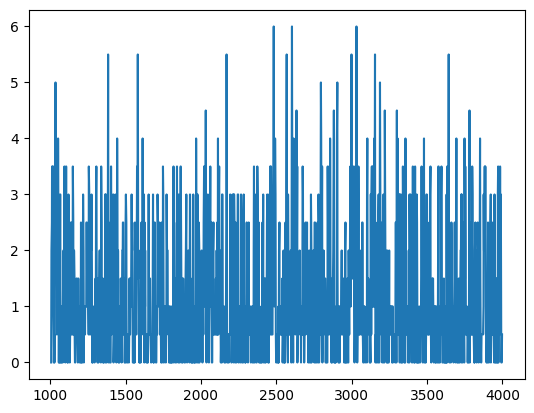

In [65]:
plt.plot(err_past)

In [66]:
X_new_err = best_mid.X_test.copy()
X_new_err[err_names] = X_err_test1[err_names]
X_new_err = X_new_err.dropna()

y_new_vals = mids_p.iloc[len(err_names)+1:]

# X_new_err = sm.add_constant(X_new_err)
model_new = sm.OLS(y_new_vals, X_new_err).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              mid_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.546e+09
Date:                Mon, 01 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:53:23   Log-Likelihood:                         -2899.3
No. Observations:                1496   AIC:                                      5803.
Df Residuals:                    1494   BIC:                                      5813.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
lagg 1          1.0000   1.25e-05   7.97e+04      0.000       1.000       1.000
err_shift_1    -0.0032      0.037     -0.086      0.932      -0.076       0.070
==============================================================================
Omnibus:                       19.290   Durbin-Watson:                   2.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.667
Skew:                          -0.009   Prob(JB):                     8.06e-08
Kurtosis:                       3.724   Cond. No.                     4.25e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
X_err_test2 = sm.add_constant(X_err_test2)
model_err_2 = sm.OLS(y_err_test.iloc[1:], X_err_test2).fit()
model_err_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            err_shift_0   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     175.2
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           6.80e-38
Time:                        09:53:23   Log-Likelihood:                -2275.1
No. Observations:                1496   AIC:                             4554.
Df Residuals:                    1494   BIC:                             4565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8157      0.041     19.833      0.000       0.735       0.896
err_sum        0.3239      0.024     13.235      0.000       0.276       0.372
==============================================================================
Omnibus:                      212.662   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.025
Skew:                           1.034   Prob(JB):                     2.90e-68
Kurtosis:                       3.846   Cond. No.                         2.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
diff_df

,bid_price_1,sign,conseq_neg,conseq_pos,conseq_no_change,prev_sign,neg_to_pos,pos_to_neg,pos_to_zero,neg_to_zero,zero_to_pos,zero_to_neg
3,-5.0,-1.0,1,0,0,NaN,0,0,0,0,0,0
4,0.0,0.0,0,0,1,-1.0,0,0,0,1,0,0
7,-1.0,-1.0,1,0,0,0.0,0,0,0,0,0,1
9,-1.0,-1.0,2,0,0,-1.0,0,0,0,0,0,0
11,1.0,1.0,0,1,0,-1.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0.0,0.0,0,0,2,0.0,0,0,0,0,0,0
3993,0.0,0.0,0,0,3,0.0,0,0,0,0,0,0
3994,0.0,0.0,0,0,4,0.0,0,0,0,0,0,0
3996,0.0,0.0,0,0,5,0.0,0,0,0,0,0,0


In [69]:
df_vol = sdf.copy()

condition_bid = (df_vol['bid_price_1'] <= df_vol['mid_price'].shift(1)) | df_vol['bid_price_2'].isna()
bid_selected_series = np.where(condition_bid, df_vol['bid_price_1'], df_vol['bid_price_2'])

condition_ask = (df_vol['ask_price_1'] >= df_vol['mid_price'].shift(1)) | df_vol['ask_price_2'].isna()
ask_selected_series = np.where(condition_ask, df_vol['ask_price_1'], df_vol['ask_price_2'])

df_vol['bid_selected_series'] = bid_selected_series.astype(int)
df_vol['ask_selected_series'] = ask_selected_series.astype(int)

bi, ai = test_regression_models(5, df_vol, 'bid_price_1', 'bid_price_1'), test_regression_models(5, df_vol, 'ask_price_1', 'ask_price_1')

In [70]:
vol_check_b, vol_check_a = bi[3], ai[3]

df_vol_test = df_vol.iloc[508:].copy()
df_vol_test['vol_check_b_ys'] = vol_check_b.y_pred
df_vol_test['vol_check_a_ys'] = vol_check_a.y_pred

In [71]:
vol_theos = []
for index, row in df_vol_test.iterrows():
    if row['bid_volume_1'] < row['ask_volume_1'] and not np.isnan(row['bid_price_2']):
        val_bid = row['bid_price_2']
        vol_theos.append((val_bid+row['ask_price_1'])/2)
    elif row['ask_volume_1'] < row['bid_volume_1'] and not np.isnan(row['ask_price_2']):
        val_ask = row['ask_price_2']
        vol_theos.append((val_ask + row['bid_price_1'])/2)
    else:
        vol_theos.append((row['vol_check_b_ys'] + row['vol_check_a_ys']) / 2)

df_vol_test['preds'] = vol_theos

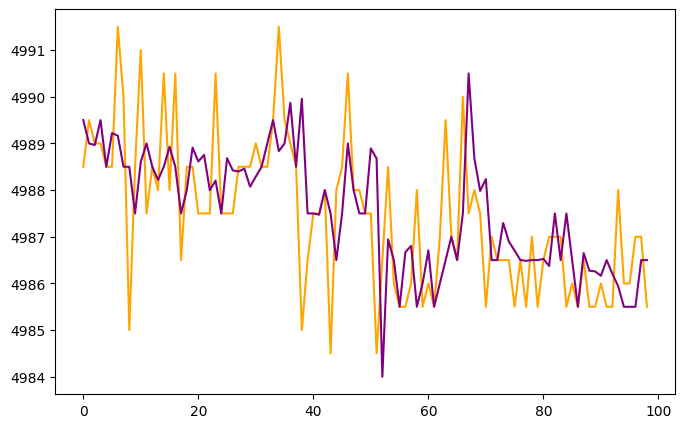

In [72]:
plt.figure(figsize=(8, 5))
shift = 0
r=100
plt.plot(np.arange(len(df_vol_test.mid_price[shift:r+shift].shift(-1))), df_vol_test.mid_price[shift:r+shift].shift(-1), color='orange')
plt.plot(np.arange(len(vol_theos[shift:r+shift-1])), vol_theos[shift:r+shift-1], color='purple')
plt.show()

In [73]:
vol_weighted_df = sdf.copy()

In [74]:
bid_volm_names = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3']
ask_volm_names = ['ask_volume_1', 'ask_volume_2', 'ask_volume_3']

vol_weighted_df['tot_bid_vol'] = vol_weighted_df[bid_volm_names].sum(axis=1)
vol_weighted_df['tot_ask_vol'] = vol_weighted_df[ask_volm_names].sum(axis=1)

bid_weights = ['bid_weight_1', 'bid_weight_2', 'bid_weight_3']
ask_weights = ['ask_weight_1', 'ask_weight_2', 'ask_weight_3']

for i in range(0,3):
    bid_name = bid_volm_names[i]
    bid_weight = bid_weights[i]
    bid_price = f'bid_price_{i+1}'

    vol_weighted_df[bid_weight] = (vol_weighted_df[bid_name] / vol_weighted_df['tot_bid_vol'])*vol_weighted_df[bid_price]

for i in range(0,3):
    ask_name = ask_volm_names[i]
    ask_weight = ask_weights[i]
    ask_price = f'ask_price_{i+1}'

    vol_weighted_df[ask_weight] = vol_weighted_df[ask_name] / vol_weighted_df['tot_ask_vol']*vol_weighted_df[ask_price]

vol_weighted_df['weighted_bid'] = vol_weighted_df[bid_weights].sum(axis=1)
vol_weighted_df['weighted_ask'] = vol_weighted_df[ask_weights].sum(axis=1)
mid_weighted_vals = (vol_weighted_df['weighted_bid']+vol_weighted_df['weighted_ask'])/2

mid_weighted_vals = mid_weighted_vals[508:]

In [75]:
X_w = vol_weighted_df['weighted_bid'].shift(1).dropna()
X_w = X_w.reset_index(drop=True)
y_w = vol_weighted_df['bid_price_1'].iloc[:-1]
y_w = y_w.reset_index(drop=True)


w_mod = sm.OLS(y_w, X_w).fit()
w_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            bid_price_1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.597e+10
Date:                Mon, 01 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:53:23   Log-Likelihood:                         -3481.4
No. Observations:                1999   AIC:                                      6965.
Df Residuals:                    1998   BIC:                                      6970.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
weighted_bid     1.0001   6.21e-06   1.61e+05      0.000       1.000       1.000
==============================================================================
Omnibus:                      993.726   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4408.277
Skew:                           2.489   Prob(JB):                         0.00
Kurtosis:                       8.305   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
w_bids = vol_weighted_df['weighted_bid'] * 1.000142
w_bids = w_bids.iloc[:-1]
w_y_b = vol_weighted_df['bid_price_1'].shift(-1).dropna()

w_asks = vol_weighted_df['weighted_ask'] * 1.000142
w_asks = w_asks.iloc[:-1]
w_y_a = vol_weighted_df['ask_price_1'].shift(-1).dropna()

In [77]:
vol_weighted_df['weighted_mid'] = (vol_weighted_df['weighted_bid'] + vol_weighted_df['weighted_ask'])/2
vol_weighted_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,tot_ask_vol,bid_weight_1,bid_weight_2,bid_weight_3,ask_weight_1,ask_weight_2,ask_weight_3,weighted_bid,weighted_ask,weighted_mid
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,...,31.0,156.312500,4840.843750,NaN,5003.000000,NaN,NaN,4997.156250,5003.000000,5000.078125
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,...,24.0,4997.000000,NaN,NaN,416.916667,4587.000000,NaN,4997.000000,5003.916667,5000.458333
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,...,20.0,454.272727,4541.818182,NaN,5003.000000,NaN,NaN,4996.090909,5003.000000,4999.545455
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,...,31.0,4996.000000,NaN,NaN,5003.000000,NaN,NaN,4996.000000,5003.000000,4999.500000
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,...,27.0,4995.000000,NaN,NaN,5002.000000,NaN,NaN,4995.000000,5002.000000,4998.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,...,23.0,4949.000000,NaN,NaN,4956.000000,NaN,NaN,4949.000000,4956.000000,4952.500000
3993,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,...,22.0,4949.000000,NaN,NaN,4956.000000,NaN,NaN,4949.000000,4956.000000,4952.500000
3994,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,...,27.0,4949.000000,NaN,NaN,4956.000000,NaN,NaN,4949.000000,4956.000000,4952.500000
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,...,21.0,4949.000000,NaN,NaN,4956.000000,NaN,NaN,4949.000000,4956.000000,4952.500000


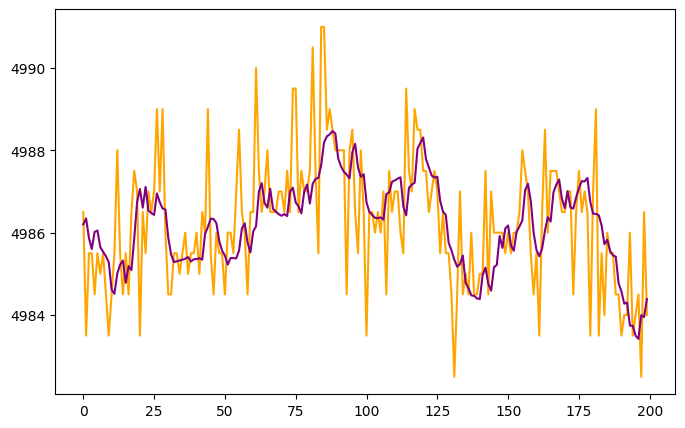

In [78]:
weight_mid_test = test_regression_models(5, vol_weighted_df, 'weighted_mid', 'mid_price')

weighted_y_preds = weight_mid_test[3].y_pred
weighted_y_test = weight_mid_test[3].y_test

weight_mid_test[3].coef[::-1], weight_mid_test[3].alpha

plt.figure(figsize=(8, 5))
shift = 100
r=200
plt.plot(np.arange(len(weighted_y_test[shift:r+shift])), weighted_y_test[shift:r+shift], color='orange')
plt.plot(np.arange(len(weighted_y_preds[shift:r+shift])), weighted_y_preds[shift:r+shift], color='purple')
plt.show()

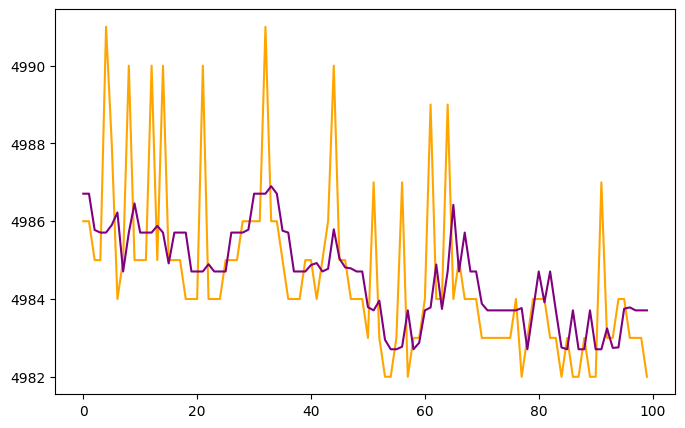

In [79]:
plt.figure(figsize=(8, 5))
shift = 510
r=100
plt.plot(np.arange(len(w_bids[shift:r+shift])), w_y_b[shift:r+shift], color='orange')
plt.plot(np.arange(len(w_bids[shift:r+shift])), w_bids[shift:r+shift], color='purple')
plt.show()

In [80]:
vol_weighted_df['weighted_mid'] = (vol_weighted_df['weighted_bid'] + vol_weighted_df['weighted_ask'])/2

# TRY EXPONENTIAL WEIGHTING

# TRY INTEGRATING BOOK STRATEGY AND WEIGHT STRATEGY

In [81]:
X_w_m = vol_weighted_df['weighted_mid'].shift(1).to_frame()
X_w_m = X_w_m.dropna()

y_w_m = vol_weighted_df['mid_price'].iloc[1:]

w_mod_m = sm.OLS(y_w_m, X_w_m).fit()
w_mod_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              mid_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.172e+10
Date:                Mon, 01 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:53:23   Log-Likelihood:                         -3282.3
No. Observations:                1999   AIC:                                      6567.
Df Residuals:                    1998   BIC:                                      6572.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
weighted_mid     1.0000   5.61e-06   1.78e+05      0.000       1.000       1.000
==============================================================================
Omnibus:                       59.548   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.246
Skew:                          -0.083   Prob(JB):                     7.84e-32
Kurtosis:                       4.301   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

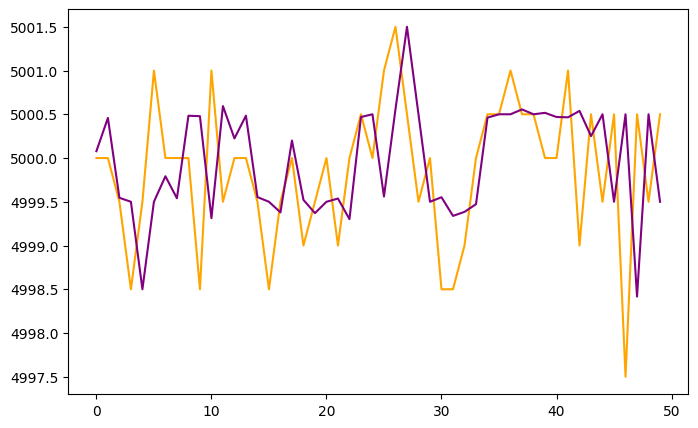

In [82]:
shift = 0
r=50
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(y_w_m[shift:r+shift])), y_w_m[shift:r+shift], color='orange')
plt.plot(np.arange(len(X_w_m[shift:r+shift])), X_w_m[shift:r+shift], color='purple')
plt.show()

In [83]:
new_app_df = sdf.copy()

In [84]:
new_app_df['bid_diff'] = np.sign(new_app_df.bid_price_1.diff().fillna(0))

In [85]:
new_app_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_selected_series,ask_selected_series,bid_diff
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0,4997,5003,0.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0,4997,5003,-1.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003,0.0
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,0.0,4996,5003,-1.0
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,0.0,4995,5002,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,23,NaN,NaN,NaN,NaN,4952.5,0.0,4949,4956,0.0
3993,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,22,NaN,NaN,NaN,NaN,4952.5,0.0,4949,4956,0.0
3994,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,27,NaN,NaN,NaN,NaN,4952.5,0.0,4949,4956,0.0
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,0.0,4949,4956,0.0


In [86]:
from statsforecast.models import AutoARIMA

d:\GitHub\Prosperity\.env\Lib\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
d:\GitHub\Prosperity\.env\Lib\site-packages\statsforecast\utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [87]:
data = np.array(new_app_df.mid_price)
data

array([5002.5, 5000. , 5000. , ..., 4952.5, 4952.5, 4952. ])

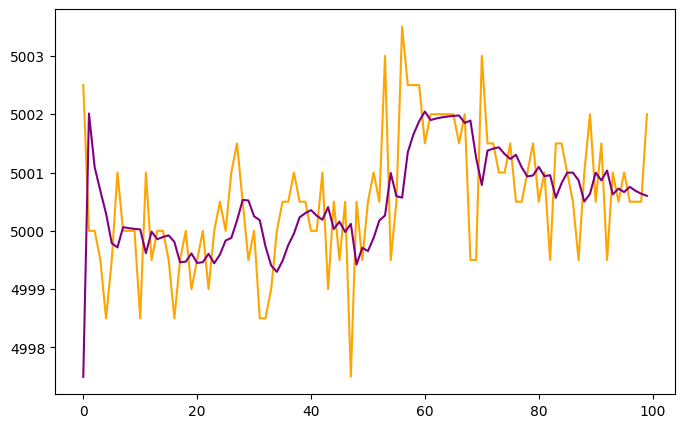

In [119]:
aarima = AutoARIMA(season_length=4)
aarima = aarima.fit(y=data)
y_hat_dict = aarima.predict_in_sample()

r=100
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(data[:r])), data[:r], color='orange')
plt.plot(np.arange(len(y_hat_dict['fitted'][:r])), y_hat_dict['fitted'][:r], color='purple')
plt.show()

# Conversions NOT available yet. Probably to do w arb or offloading inventory. 

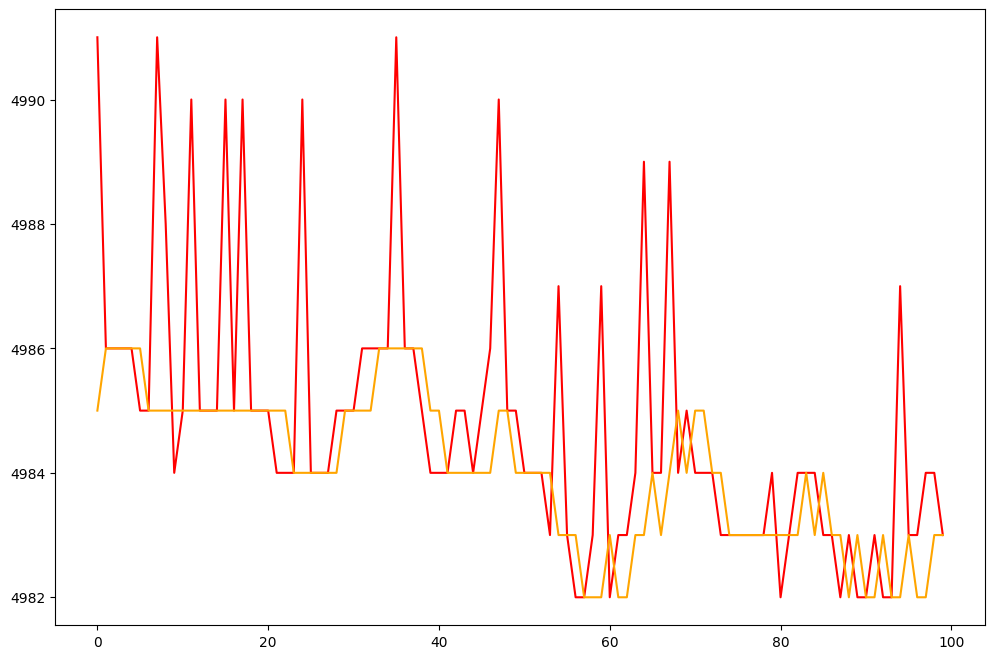

In [114]:
weight_bid_test = test_regression_models(5, vol_weighted_df, 'weighted_bid', 'bid_price_1')
weight_ask_test = test_regression_models(5, vol_weighted_df, 'weighted_ask', 'ask_price_1')

index_weighted = 3
offset = 500 + 2*(index_weighted + 1)

bweighted_y_preds = weight_bid_test[3].y_pred.astype(int)
bweighted_y_test = weight_bid_test[3].y_test

aweighted_y_preds = weight_ask_test[3].y_pred.astype(int)
aweighted_y_test = weight_ask_test[3].y_test

plt.figure(figsize=(12, 8))
shift = 0
r=100
plt.plot(np.arange(len(vol_weighted_df.bid_price_1[shift+offset:r+shift+offset])), vol_weighted_df.bid_price_1[shift+offset:r+shift+offset], color='red')
plt.plot(np.arange(len(bweighted_y_preds[shift:r+shift])), bweighted_y_preds[shift:r+shift], color='orange')
plt.show()

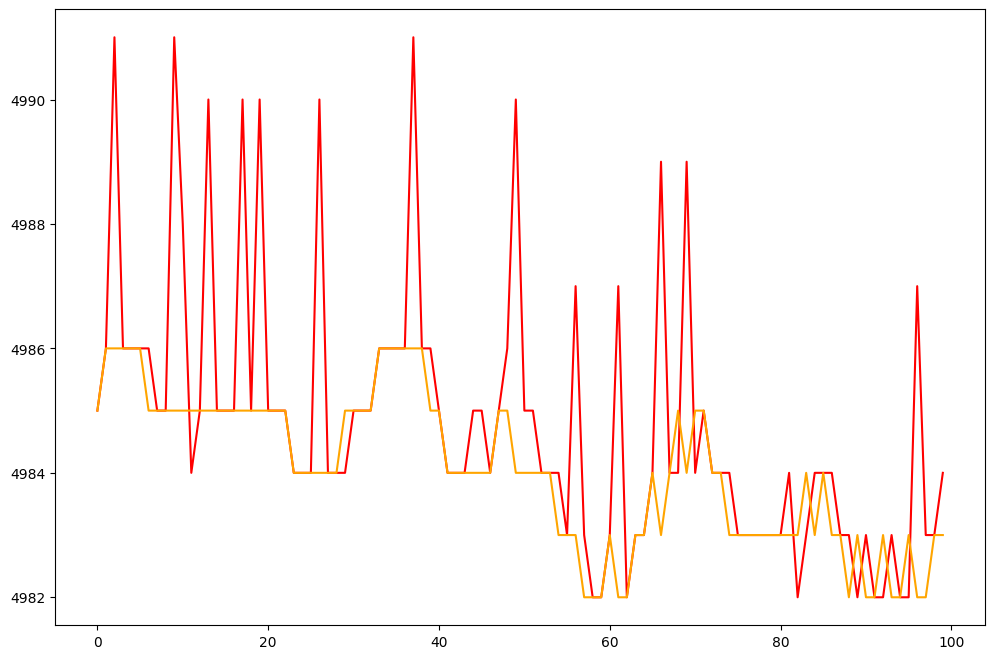

In [112]:
index_weighted = 2
offset = 500 + 2*(index_weighted + 1)

bweighted_y_preds = weight_bid_test[3].y_pred.astype(int)
bweighted_y_test = weight_bid_test[3].y_test

aweighted_y_preds = weight_ask_test[3].y_pred.astype(int)
aweighted_y_test = weight_ask_test[3].y_test

plt.figure(figsize=(12, 8))
shift = 0
r=100
plt.plot(np.arange(len(vol_weighted_df.bid_price_1[shift+offset:r+shift+offset])), vol_weighted_df.bid_price_1[shift+offset:r+shift+offset], color='red')
plt.plot(np.arange(len(bweighted_y_preds[shift:r+shift])), bweighted_y_preds[shift:r+shift], color='orange')
plt.show()

How far back of a history should I use based on autocorrelation? Partial autocorrelation

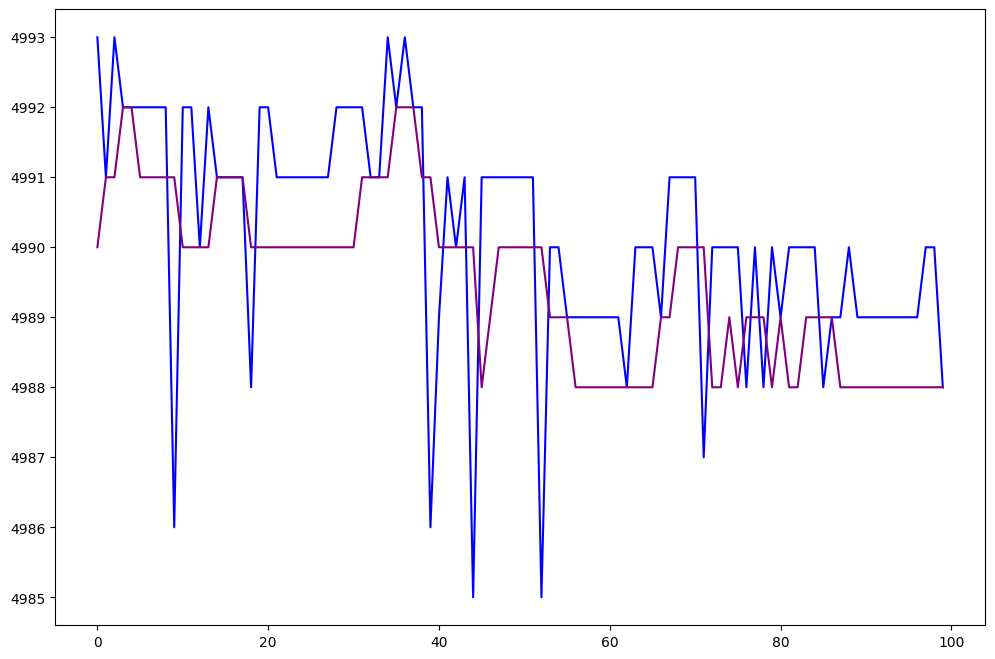

In [110]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(vol_weighted_df.ask_price_1[shift+offset:r+shift+offset])), vol_weighted_df.ask_price_1[shift+offset:r+shift+offset], color='blue')
plt.plot(np.arange(len(aweighted_y_preds[shift:r+shift])), aweighted_y_preds[shift:r+shift], color='purple')
plt.show()

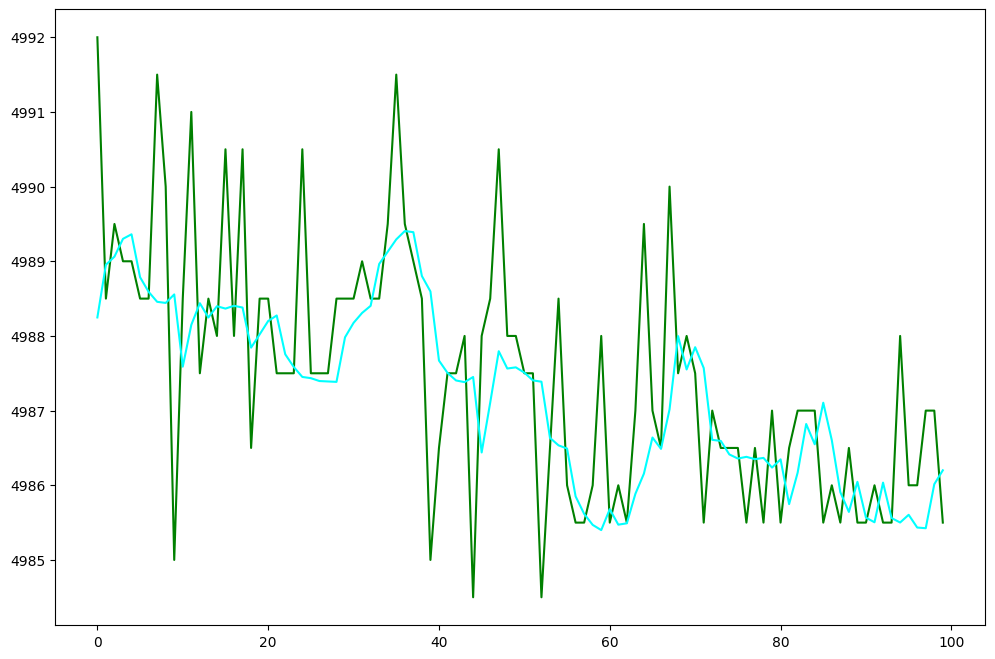

In [111]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(vol_weighted_df.mid_price[shift+offset:r+shift+offset])), vol_weighted_df.mid_price[shift+offset:r+shift+offset], color='green')
plt.plot(np.arange(len(weighted_y_preds[shift:r+shift])), weighted_y_preds[shift:r+shift], color='cyan')

In [92]:
weight_bid_test[3].coef[::-1], weight_bid_test[3].alpha

(array([0.12510656, 0.10468357, 0.20735852, 0.56092445]), 10.218076238395952)

In [93]:
weight_bid_test[3].coef[::-1], weight_bid_test[3].alpha

(array([0.12510656, 0.10468357, 0.20735852, 0.56092445]), 10.218076238395952)

In [94]:
weight_mid_test[3].coef[::-1], weight_mid_test[3].alpha

(array([0.07294425, 0.13279522, 0.19364201, 0.60387595]), -16.368438120524843)

#### Positive bid vol -> I am willing to buy from you at this price
#### Negative bid vol -> I am willing to sell to you at this price

#### Positive ask vol -> I am willing to sell from you at this price
#### Negative ask vol -> I am willing to buy to you at this price